## Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

->Airlines Delay: Airline on-time statistics and delay causes

 Important

Redueix la dimensió del dataset de manera aleatòria per tal d'obtenir un dataset de només 200.000 registres. Tots els exercicis s'han de fer amb aquest dataset reduït.

In [1]:
import pandas as pd

df = pd.read_csv('DelayedFlights.csv')

df_random = df.sample(n = 200000)

df_random['UniqueCarrier'].unique()

array(['OH', 'OO', 'UA', 'XE', 'NW', 'WN', 'AA', 'DL', 'CO', 'US', 'FL',
       'EV', 'MQ', 'HA', 'AS', 'B6', 'F9', 'YV', '9E', 'AQ'], dtype=object)

In [2]:
df_random.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1790245 to 1358229
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199231 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199098 non-null  float64
 13  CRSElapsedTime     199983 non-null  float64
 14  AirTime            199098 non-null  float64
 15  ArrDelay           199098 non-null  float64


## Exercici 2
Fes un informe complet del dataset:

Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.
Troba quantes dades faltants hi ha per columna.
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).
Fes una taula de les aerolínies amb més endarreriments acumulats.
Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.
Aporta allò que consideris rellevant.

          Unnamed: 0      Year          Month     DayofMonth      DayOfWeek  \
count   2.000000e+05  200000.0  200000.000000  200000.000000  200000.000000   
unique           NaN       NaN            NaN            NaN            NaN   
top              NaN       NaN            NaN            NaN            NaN   
freq             NaN       NaN            NaN            NaN            NaN   
mean    3.339528e+06    2008.0       6.108070      15.766445       3.979425   
std     2.065568e+06       0.0       3.482482       8.772406       1.996009   
min     3.300000e+01    2008.0       1.000000       1.000000       1.000000   
25%     1.515086e+06    2008.0       3.000000       8.000000       2.000000   
50%     3.240484e+06    2008.0       6.000000      16.000000       4.000000   
75%     4.968504e+06    2008.0       9.000000      23.000000       6.000000   
max     7.009726e+06    2008.0      12.000000      31.000000       7.000000   

              DepTime     CRSDepTime       ArrTime 

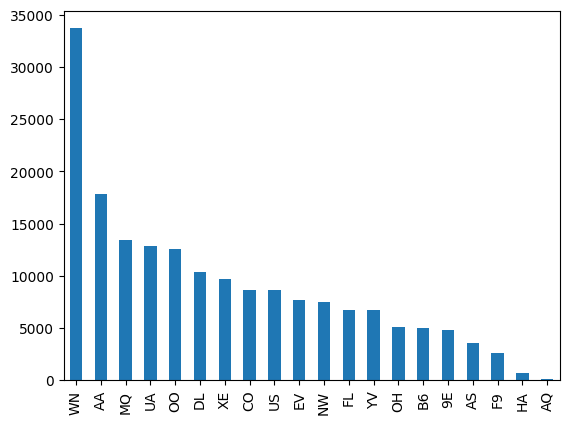

In [11]:
import numpy as np
import matplotlib as plt
# estadistiques generals de totes les variables
print(df_random.describe(include='all'))

# afegeixo la variable velocitat de cada vol
df_random['velocitat'] = df_random['Distance']/df_random['AirTime']

# Afegeixo una columna que especifica si hi ha un retard
df_random['Delay'] = np.where(df_random['ArrDelay'] > 0, 'Delay', 'No delay')

# selecciono les dades en que es produeix un retard en el vol
df_delay = df_random[df_random['Delay']=='Delay']



print(df_delay['UniqueCarrier'].value_counts().plot(kind='bar'))

In [4]:
# contar NA

nan_count = df_random.isna().sum()
print(nan_count)

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                737
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  1
ActualElapsedTime      888
CRSElapsedTime          16
AirTime                888
ArrDelay               888
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 737
TaxiOut                 59
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71230
WeatherDelay         71230
NASDelay             71230
SecurityDelay        71230
LateAircraftDelay    71230
velocitat              888
Delay                    0
dtype: int64


## Exercici 3
Exporta el dataset net i amb les noves columnes a Excel.

In [4]:
df_delay.to_csv('df_delay.csv')

WN    33714
AA    17784
MQ    13435
UA    12870
OO    12586
DL    10397
XE     9659
CO     8682
US     8612
EV     7638
NW     7451
FL     6757
YV     6714
OH     5061
B6     4983
9E     4811
AS     3531
F9     2561
HA      728
AQ       66
Name: UniqueCarrier, dtype: int64